In [63]:
import glob                 #To get files from folder
import pandas as pd         #To read those files
import numpy as np          #To do mathematical operation
import os                   #Files manupulation 

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB                       #Model import from sklearn
from sklearn.feature_extraction.text import CountVectorizer          
from sklearn.model_selection import train_test_split                 
from sklearn.metrics import accuracy_score                           #How the classifire works/ How accruate it is!
import time                                                          #How much time it take to run
import re                                                            #Replacement
from sklearn.pipeline import Pipeline                                
from sklearn.feature_extraction.text import TfidfTransformer         
from sklearn.metrics import confusion_matrix                         #Model description with color 
import joblib                                                        


In [64]:
all_file = glob.glob("../songData/*.xlsx")
len(all_file)

21

In [65]:
all_file

g = all_file[2]
g.split('\\')[1][:-5]

'songType10'

In [66]:
names = []
count = []
clusters = []
data = []

for each in all_file:
    temp = pd.read_excel(each,engine='openpyxl')
    
    
    count.append(len(temp))
    names.append(each.split('/')[1][:-5])
    clusters.append(temp['songType'])
    
    
    data.append(temp)
    
cluster_ids =clusters    

In [67]:
data = pd.concat(data)
data = data.sample(frac =1)

data

,Unnamed: 0,lyrics,songType
164,1196,বিশ্ববিদ্যালয়ে সারারাত অবিরাম গোলাগুলি আর পরদ...,13
699,2918,যদি বন্ধু হও যদি বাড়াও হাত জেনো থামবে ঝড় মুছে ...,1
192,764,ভালো লাগে না তুমি না এলে কি যে করি বলো দূরে গে...,3
103,1126,এ কোন মধুর শরাব দিলে আল্‌-আরাবী সাকী নেশায় হলা...,7
735,3225,তোমার গীতি জাগালো স্মৃতি নয়ন ছলছলিয়া বাদল শেষে...,17
...,...,...,...
179,1342,একদিন ঘুম ভাঙ্গা শহরে মায়াবি সন্ধ্যায় চাঁদ জ...,13
20,328,প্রানের অসুখ সুখ প্রাণের অসুখ ভেংগে দিল সময়ের ...,13
55,3701,"বাঁধা দিও না……না দিও না ও মোর প্রেম, ও মোর প্র...",9
917,3823,আলোরই ঝলকে চোখেরসই পলকে এই মনের ভালবাসা উঁকি ম...,1


In [68]:
data['lyrics']

164    বিশ্ববিদ্যালয়ে সারারাত অবিরাম গোলাগুলি আর পরদ...
699    যদি বন্ধু হও যদি বাড়াও হাত জেনো থামবে ঝড় মুছে ...
192    ভালো লাগে না তুমি না এলে কি যে করি বলো দূরে গে...
103    এ কোন মধুর শরাব দিলে আল্‌-আরাবী সাকী নেশায় হলা...
735    তোমার গীতি জাগালো স্মৃতি নয়ন ছলছলিয়া বাদল শেষে...
                             ...                        
179    একদিন ঘুম ভাঙ্গা শহরে মায়াবি সন্ধ্যায় চাঁদ জ...
20     প্রানের অসুখ সুখ প্রাণের অসুখ ভেংগে দিল সময়ের ...
55     বাঁধা দিও না……না দিও না ও মোর প্রেম, ও মোর প্র...
917    আলোরই ঝলকে চোখেরসই পলকে এই মনের ভালবাসা উঁকি ম...
716    এই বালুকা বেলায় আমি লিখেছিনু একটি সে নাম আমি ল...
Name: lyrics, Length: 4105, dtype: object

In [69]:
stopwords = ['হাই', 'ফ্রিকুয়েন্সি', 'কিন্তু', 'অপ্রয়োজনীয়', 'শব্দ', 'অবশ্য']



In [70]:
data['lyrics'] = data['lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [71]:
X_train, X_test, y_train, y_test =  train_test_split(data['lyrics'], data['songType'], test_size=0.33, random_state=42 )

In [72]:
X_train.shape

(2750,)

In [73]:
X_test.shape

(1355,)

In [74]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import metrics

total_data_count = len(data)
per_class_counts = []
# unique_classes = np.unique(data['idx'].values)
unique_classes = np.unique(data['songType'].values)

class_count_mean = np.mean(count)

###########################3
############### classifier setup ################

from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([
    
    ('vect', CountVectorizer(stop_words=stopwords,
                            analyzer="word", 
                            lowercase=False,
                            token_pattern="[\S]*",
                            tokenizer=None,
                            ngram_range=(1, 3),
                            preprocessor=None)),                 
    ('tfidf', TfidfTransformer()),
    ('clf-svm', RandomForestClassifier(max_depth=2, random_state=0)),
                                                                        
])
classifier = text_clf_svm.fit(list(X_train), list(y_train))


cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
score = cross_val_score(text_clf_svm, list(X_train), list(y_train), cv=cv)

print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


predicted = classifier.predict(X_test)

C:\Users\MANSTEIN\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens [''] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\MANSTEIN\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens [''] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\MANSTEIN\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens [''] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\MANSTEIN\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with

Cross Accuracy: 0.28 (+/- 0.03)


In [75]:
print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print(metrics.classification_report(y_test, predicted))

Cross Accuracy: 0.28 (+/- 0.03)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.24      1.00      0.39       318
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00       263
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00        20
           6       0.00      0.00      0.00        29
           7       0.00      0.00      0.00        61
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00        21
          10       0.00      0.00      0.00        16
          11       0.00      0.00      0.00        20
          12       0.00      0.00      0.00        34
          13       0.00      0.00      0.00       233
          14       0.00      0.00      0.00        19
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00      

C:\Users\MANSTEIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
import pandas as pd
confusion_matrix = list(metrics.confusion_matrix(y_test, predicted))

print(len(confusion_matrix), len(confusion_matrix[0]))
print(len(names), len(names[0]))

21 21
21 18


<AxesSubplot:>

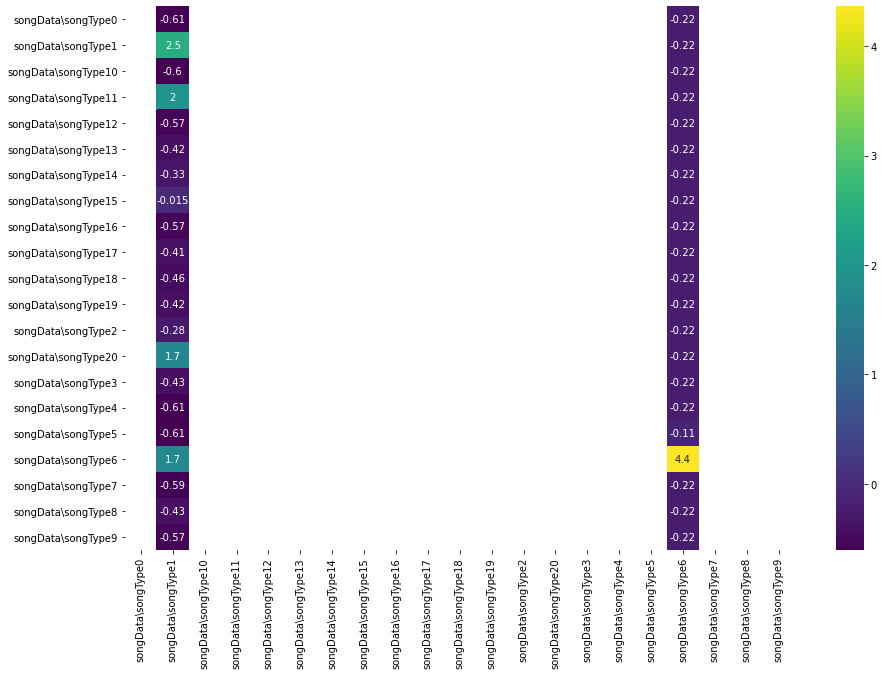

In [77]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix
df_cm = pd.DataFrame(array, index = [i for i in names],
              columns = [i for i in names])
df_norm_col=(df_cm-df_cm.mean())/df_cm.std()
#df_norm_col=df_cm-df_cm.mean()
plt.figure(figsize = (15,10))
sn.heatmap(df_norm_col, annot=True,cmap='viridis')